In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import gala.dynamics as gd
import gala.potential as gp
from gala.potential import NFWPotential
from gala.units import galactic

First, define a gravitational potential.

In [2]:
pot = NFWPotential.from_M200_c(M200=1e12 * u.M_sun, c=10.0, units=galactic)

Initial conditions

In [3]:
ics = gd.PhaseSpacePosition(pos=[10, 0, 0] * u.kpc, vel=[0, 175, 0] * u.km/u.s)

        Use name instead. [gala.dynamics.core]


Define time step values to compare

In [4]:
dt_values = [1, 10, 50]  # in Myr
colors = ['blue', 'orange', 'red']
labels = ['dt = 1 Myr', 'dt = 10 Myr', 'dt = 50 Myr']

Plot them on the same figure

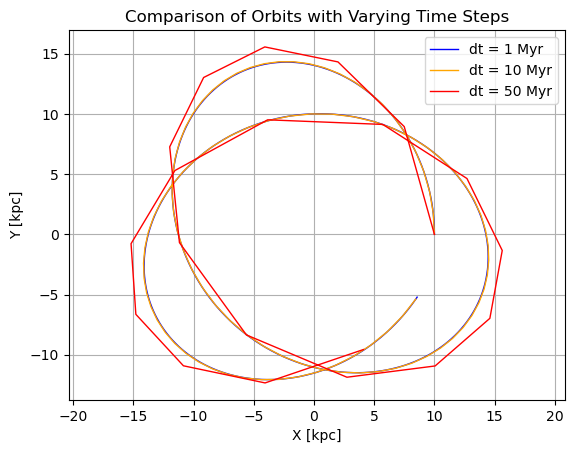

In [8]:
plt.figure()

for dt_val, color, label in zip(dt_values, colors, labels):
    dt = dt_val * u.Myr
    n_steps = int(1000 * u.Myr / dt)
    orbit = pot.integrate_orbit(ics, dt=dt, n_steps=n_steps)

    pos = orbit.pos.xyz.value
    # plt.scatter(pos[0], pos[1], color=color, label=label, s=5)
    plt.plot(pos[0], pos[1], color=color, label=label, lw=1)

plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.title('Comparison of Orbits with Varying Time Steps')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()